In [ ]:
from Archivos_Apoyo.AngleCouplingAnalyzer import AngleCouplingAnalyzer
ruta_entrenamiento_robot="logs_lift_leg/general_values_20251007_175327.pid14520.csv"
ruta_presiones_actuadores="logs_lift_leg/pressures_20251007_175327.pid14520.csv"
ruta_recompensas="logs_lift_leg/rewards_20251007_175327.pid14520.csv"
ruta_com_zmp="logs_lift_leg/kpi_step.csv"
anglecouplinganalyzer=AngleCouplingAnalyzer()

In [2]:
df_general=anglecouplinganalyzer.cargar_csv(ruta_entrenamiento_robot)
df_presiones_actuadores=anglecouplinganalyzer.cargar_csv(ruta_presiones_actuadores)
df_recompensas=anglecouplinganalyzer.cargar_csv(ruta_recompensas)
df_train=anglecouplinganalyzer.cargar_csv(ruta_com_zmp)

In [ ]:
angulos_joints=anglecouplinganalyzer.split_parameters_df(df_general, startswith="q_")
angular_speed=anglecouplinganalyzer.split_parameters_df(df_general, startswith="vel_")
torque=anglecouplinganalyzer.split_parameters_df(df_general, startswith="τ_reaction_")
forces=anglecouplinganalyzer.split_parameters_df(df_general, startswith="Forces_")
coms=anglecouplinganalyzer.split_parameters_df(df_train, startswith="com_")
zmps=anglecouplinganalyzer.split_parameters_df(df_train, startswith="zmp_")
df_angle_speed = df_general.loc[:, df_general.columns.str.startswith(("q_", "vel_"))]
df_angle_com = df_general.loc[:, df_general.columns.str.startswith(("q_left_hip", "q_right_hip", "com_"))]
df_presiones_velocidades=df_presiones_actuadores.merge(df_general, on=['step','episode','t'], how='left')
df_presiones_velocidades=df_presiones_velocidades.filter(regex=r'(?:vel_|ext|flex)')

In [4]:
df_presiones_velocidades

,L Hip roll flex,L Hip roll ext,R Hip roll flex,R Hip roll ext,L Hip pitch flex,L Hip pitch ext,R Hip pitch flex,R Hip pitch ext,L Knee flex,L Knee ext,...,Forces_right_knee_joint_y,Forces_right_knee_joint_z,q_right_anckle_joint,vel_right_anckle_joint,τ_reaction_right_anckle_joint_x,τ_reaction_right_anckle_joint_y,τ_reaction_right_anckle_joint_z,Forces_right_anckle_joint_x,Forces_right_anckle_joint_y,Forces_right_anckle_joint_z
0,0.000000,0.373411,0.0,0.186862,0.579273,0.000000,0.000000,1.000000,0.000000,0.002474,...,13.160,155.871,0.015,0.344,1.71,9.92,-19.54,-3.616,-2.872,3.923
1,0.000000,0.373411,0.0,0.186862,0.579273,0.000000,0.000000,1.000000,0.000000,0.002474,...,13.160,155.871,0.015,0.344,1.71,9.92,-19.54,-3.616,-2.872,3.923
2,0.000000,0.373411,0.0,0.186862,0.579273,0.000000,0.000000,1.000000,0.000000,0.002474,...,13.160,155.871,0.015,0.344,1.71,9.92,-19.54,-3.616,-2.872,3.923
3,0.000000,0.373411,0.0,0.186862,0.579273,0.000000,0.000000,1.000000,0.000000,0.002474,...,13.160,155.871,0.015,0.344,1.71,9.92,-19.54,-3.616,-2.872,3.923
4,0.000000,0.373411,0.0,0.186862,0.579273,0.000000,0.000000,1.000000,0.000000,0.002474,...,13.160,155.871,0.015,0.344,1.71,9.92,-19.54,-3.616,-2.872,3.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,0.000000,0.958746,0.0,1.000000,0.000000,0.169009,0.553332,0.000000,0.000000,1.000000,...,50.100,-233.184,-0.017,-0.783,-92.80,-8.73,32.97,-11.445,-103.724,-245.525
781,0.627258,0.994834,0.0,1.000000,0.526667,0.000000,0.705438,0.027977,0.000000,1.000000,...,-54.506,-171.512,0.029,0.250,-6.51,-13.89,-0.12,-26.601,-24.182,-187.694
782,0.500096,1.000000,0.0,1.000000,0.549443,0.000000,1.000000,0.000000,0.000000,1.000000,...,-45.136,-171.103,0.075,0.345,-17.98,-4.01,8.58,-11.873,-80.284,-195.984
783,0.000000,1.000000,0.0,1.000000,0.903988,0.000000,1.000000,0.175469,0.000000,1.000000,...,-63.269,-274.493,0.155,0.999,-5.31,-12.70,-2.18,70.472,-87.981,-246.821


In [4]:
corr_angulos = anglecouplinganalyzer.correlacion_entre_params(angulos_joints)
corr_angular_speed = anglecouplinganalyzer.correlacion_entre_params(angular_speed)
corr_torque = anglecouplinganalyzer.correlacion_entre_params(torque)
corr_forces = anglecouplinganalyzer.correlacion_entre_params(forces)
corr_presiones=anglecouplinganalyzer.correlacion_entre_params(df_presiones_actuadores.iloc[:,3:])
corr_recompensas=anglecouplinganalyzer.correlacion_entre_params(df_recompensas.iloc[:,3:])
corr_coms=anglecouplinganalyzer.correlacion_entre_params(coms)
corr_zmp=anglecouplinganalyzer.correlacion_entre_params(zmps)

In [ ]:
corr_angulo_velocidad=anglecouplinganalyzer.correlacion_entre_params(df_angle_speed)
corr_velocidad_presiones=anglecouplinganalyzer.correlacion_entre_params(df_presiones_velocidades)
corr_com_angulo=anglecouplinganalyzer.correlacion_entre_params(df_angle_com)

In [10]:
corr_angulo_velocidad

q_left_anckle_joint         NaN
q_left_hip_pitch_joint      NaN
q_left_hip_roll_joint       NaN
q_left_knee_joint           NaN
q_right_anckle_joint        NaN
q_right_hip_pitch_joint     NaN
q_right_hip_roll_joint      NaN
q_right_knee_joint          NaN
vel_left_anckle_joint       NaN
vel_left_hip_pitch_joint    NaN
vel_left_hip_roll_joint     NaN
vel_left_knee_joint         NaN
vel_right_anckle_joint      NaN
vel_right_hip_pitch_joint   NaN
vel_right_hip_roll_joint    NaN
vel_right_knee_joint        NaN
dtype: float64

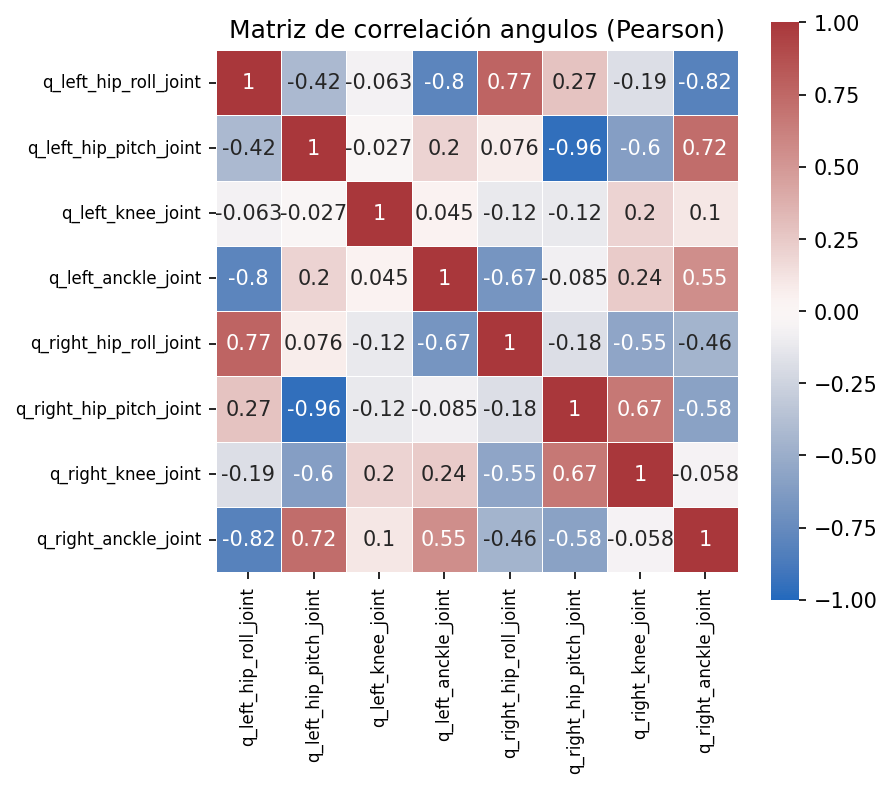

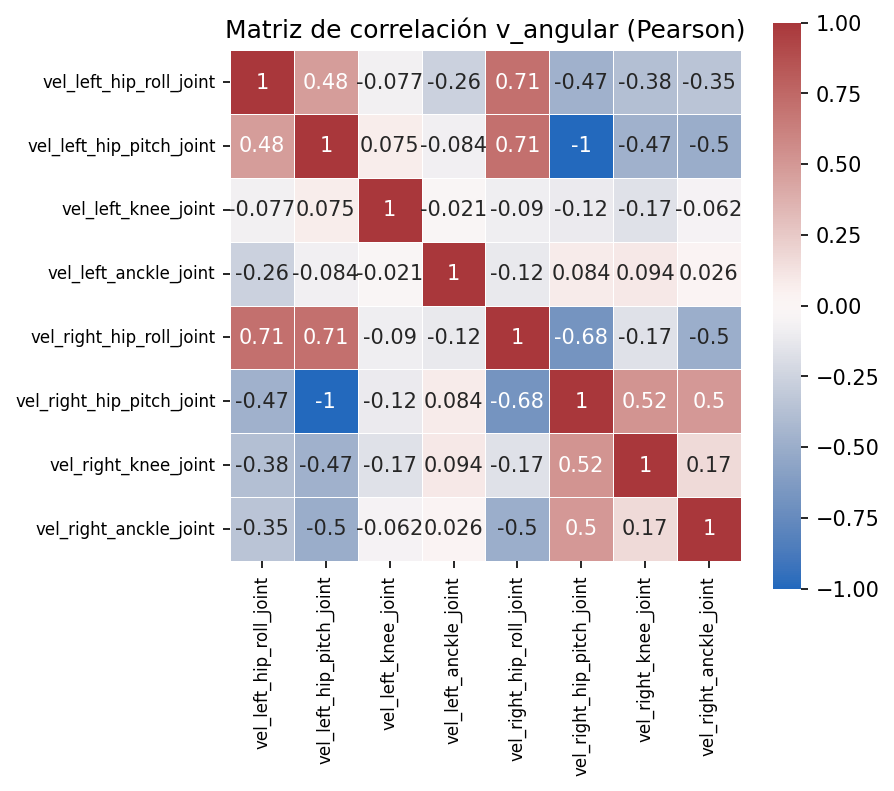

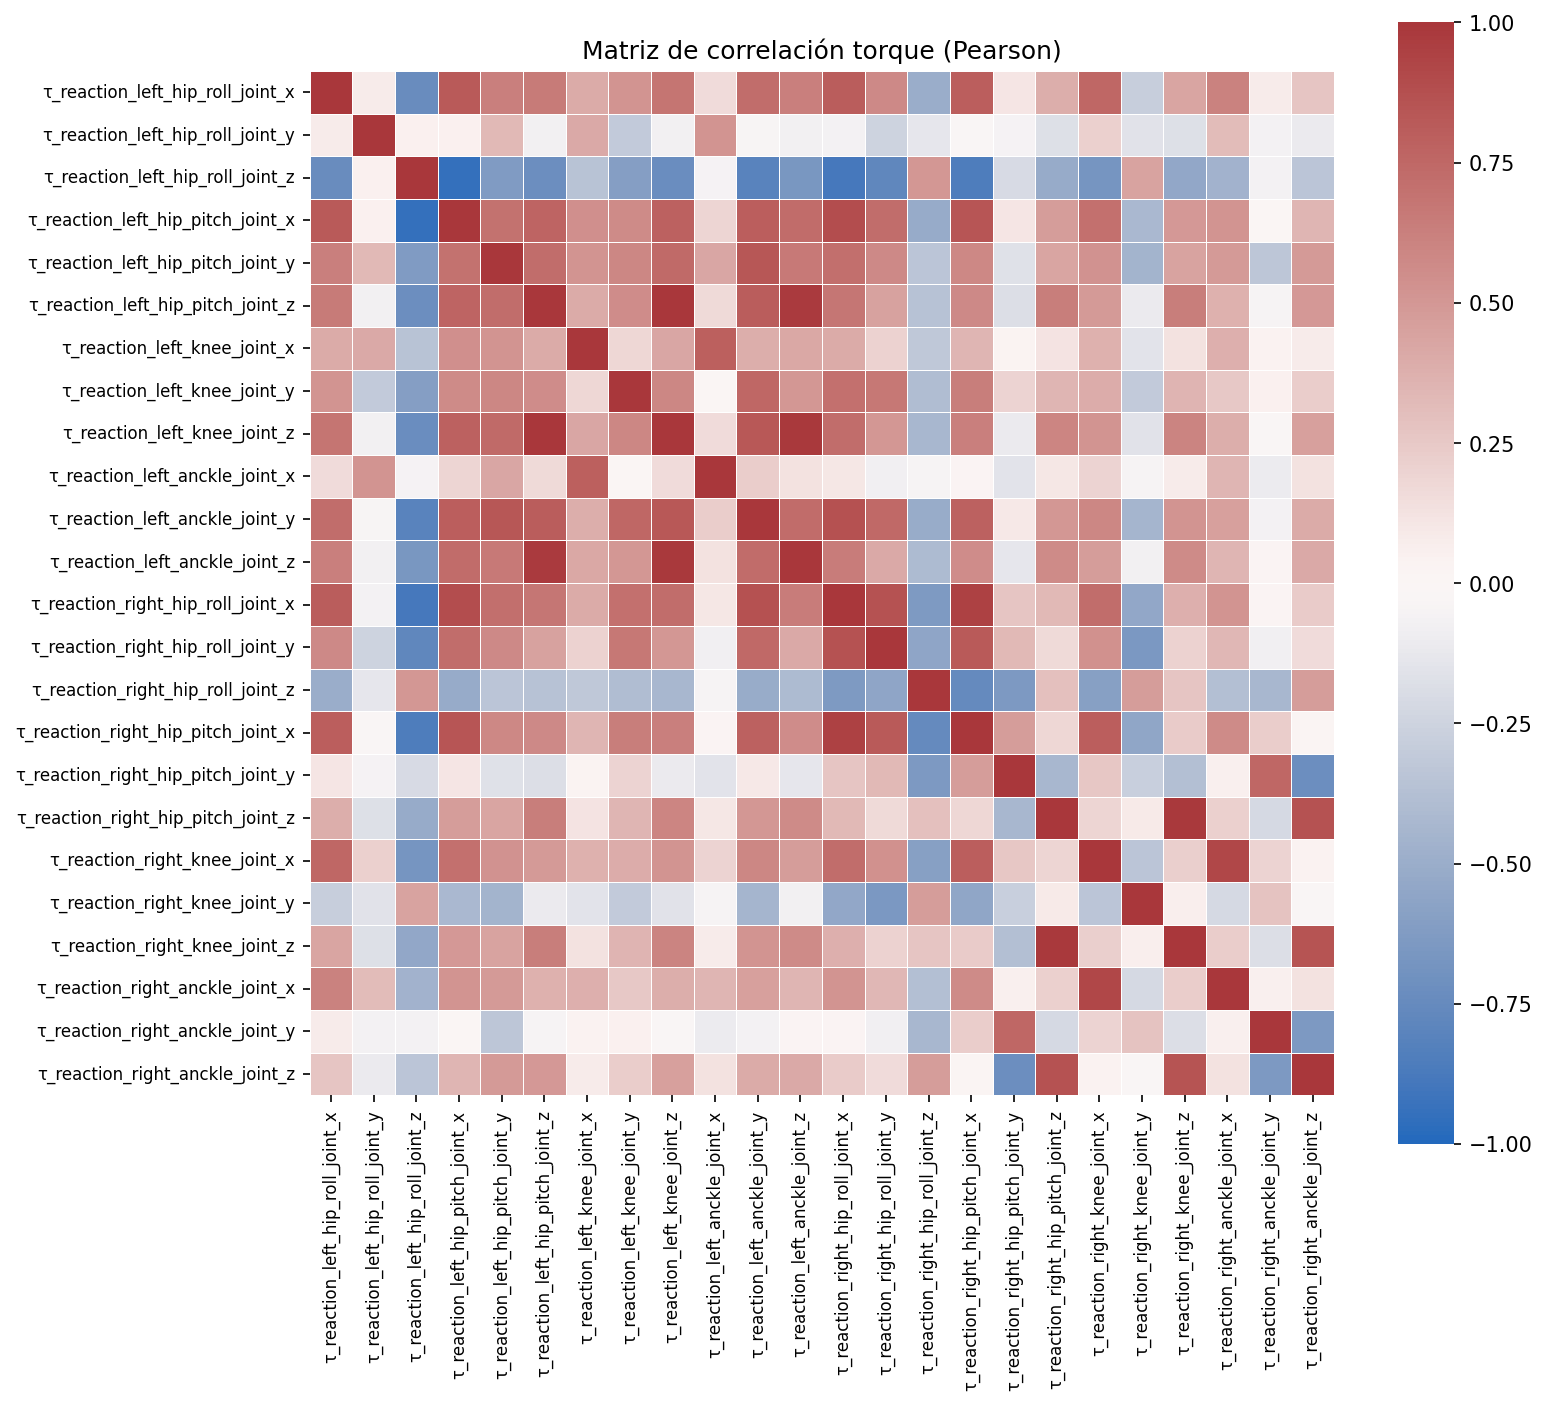

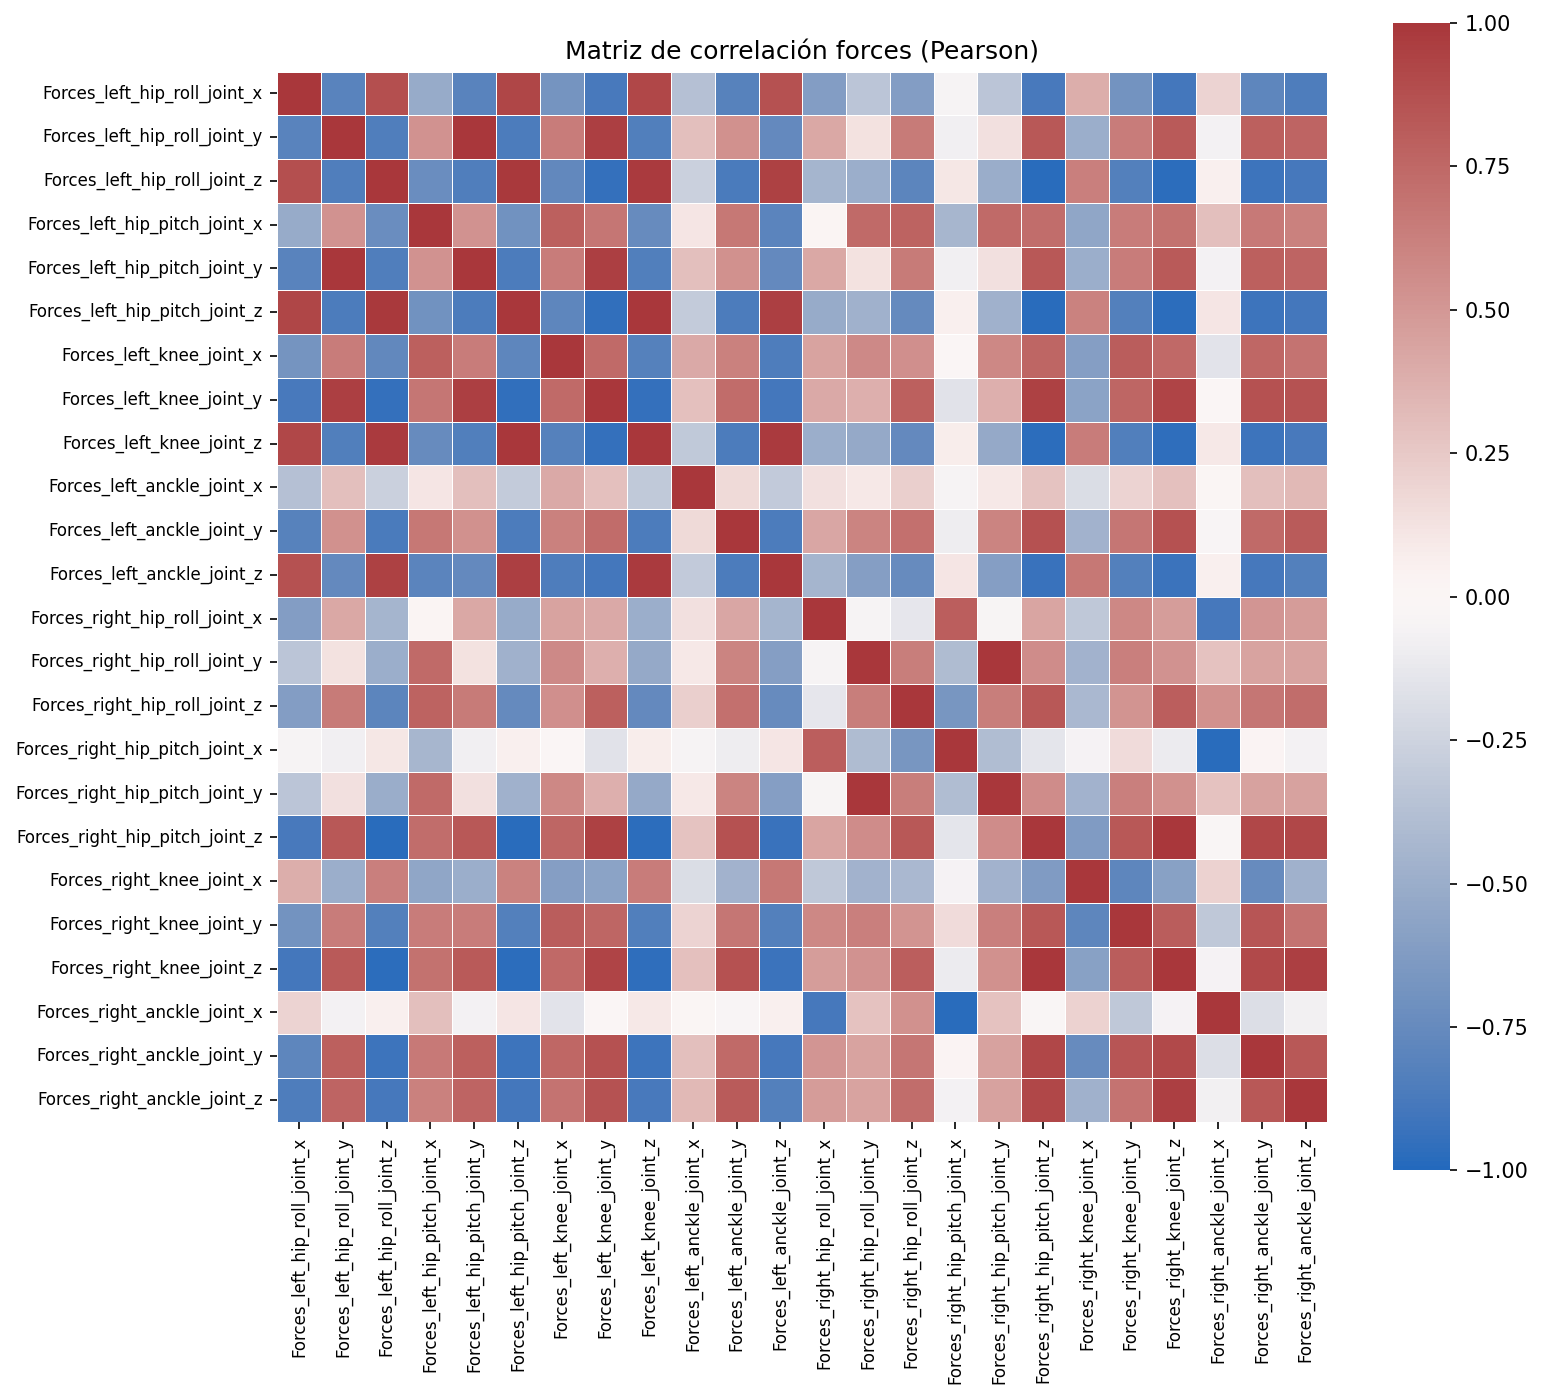

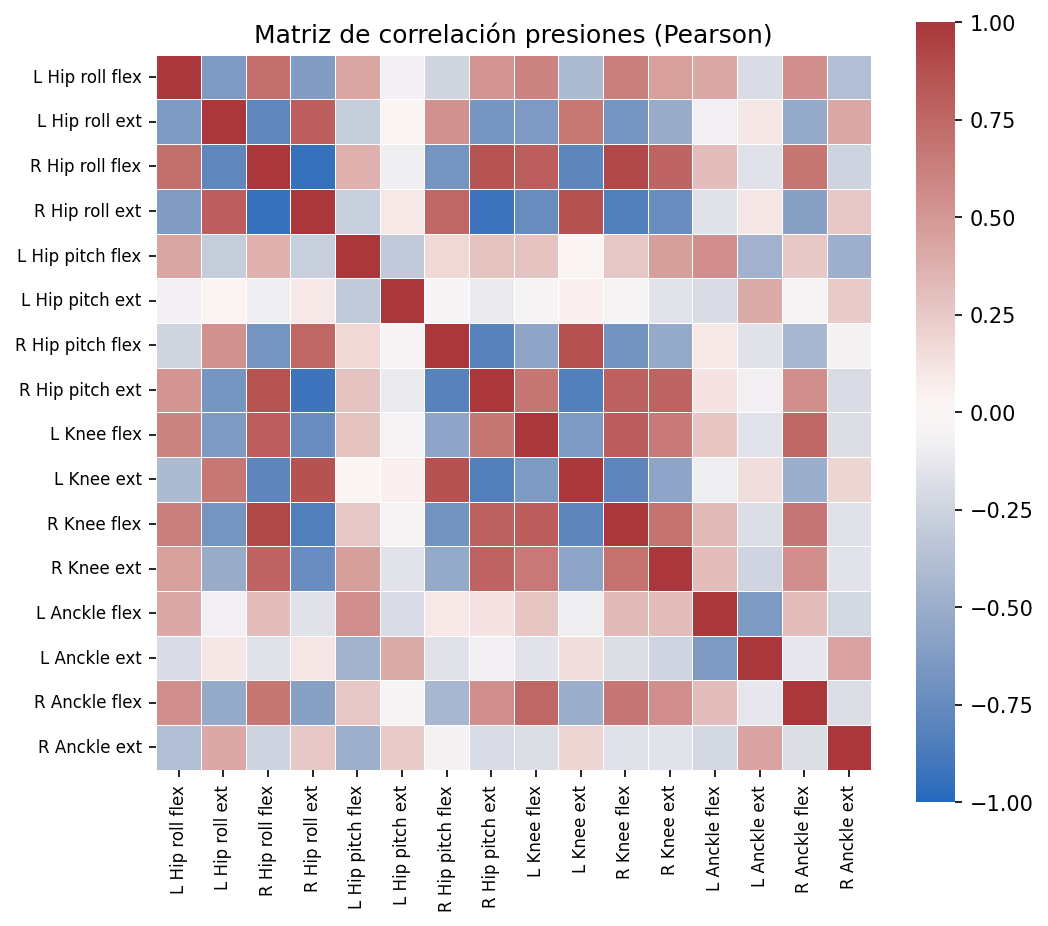

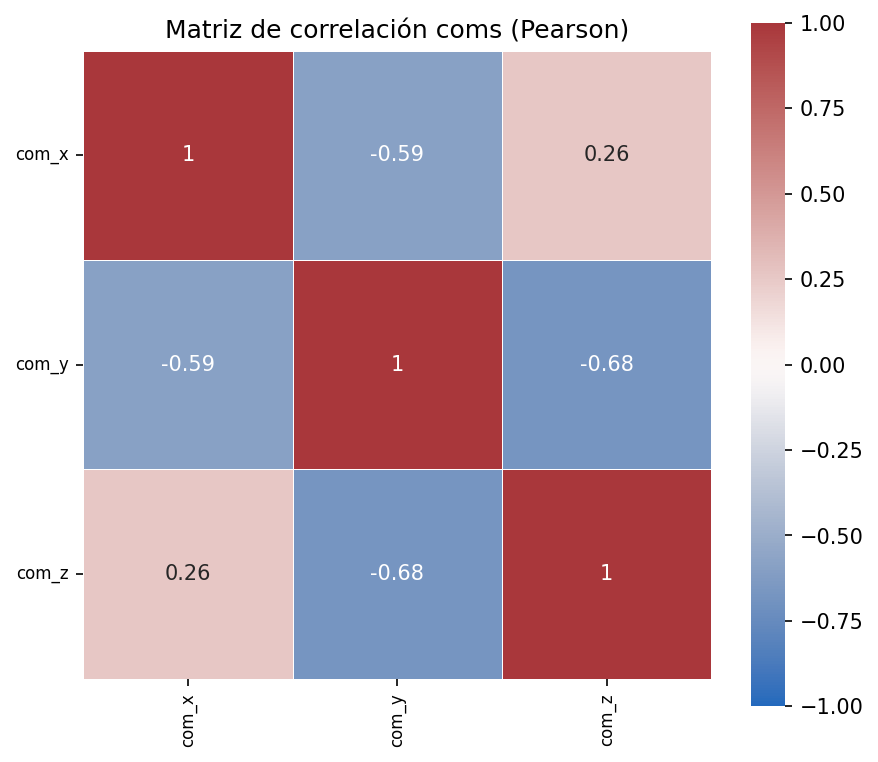

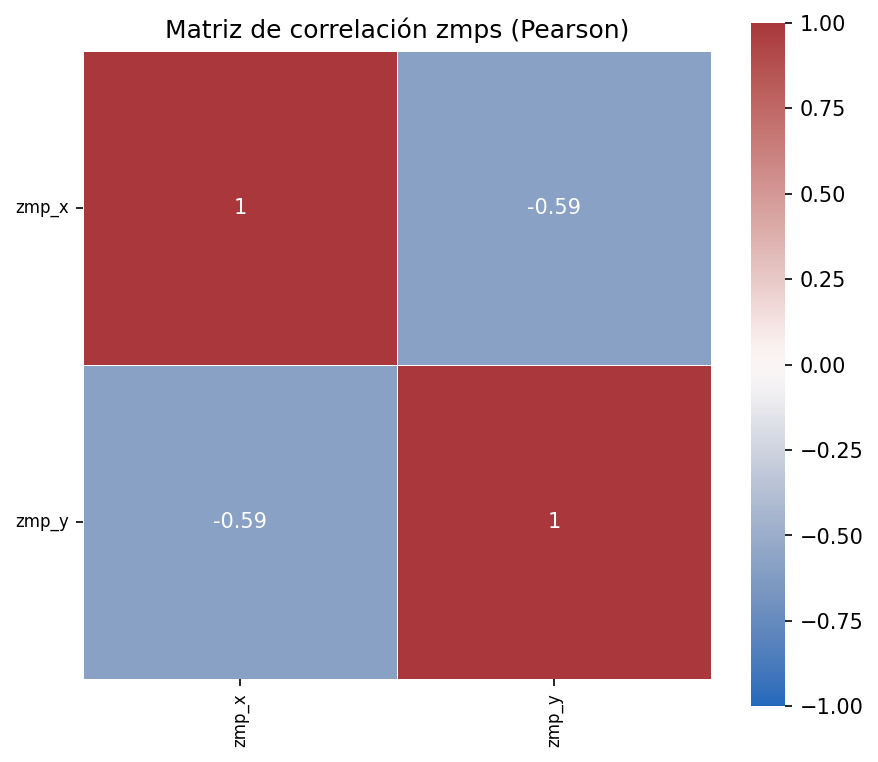

ValueError: not enough values to unpack (expected 2, got 1)

In [6]:
anglecouplinganalyzer.creacion_correlaciones(corr_angulos,"angulos")
anglecouplinganalyzer.creacion_correlaciones(corr_angular_speed, "v_angular")
anglecouplinganalyzer.creacion_correlaciones(corr_torque,"torque", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_forces, "forces", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_presiones, "presiones", annot=False)
#anglecouplinganalyzer.creacion_correlaciones(corr_recompensas, "recompensas", annot=False)
anglecouplinganalyzer.creacion_correlaciones(corr_coms, "coms")
anglecouplinganalyzer.creacion_correlaciones(corr_zmp, "zmps")
anglecouplinganalyzer.creacion_correlaciones(corr_angulo_velocidad, "theta_vs_omega")
anglecouplinganalyzer.creacion_correlaciones(corr_velocidad_presiones, "omega_vs_pressure")
anglecouplinganalyzer.creacion_correlaciones(corr_com_angulo, "COM_vs_theta")